In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load,Explore & Prepare Dataset

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [3]:
train_set = pd.read_csv('./Dataset/NSL_KDD_Train.csv', header=None, names = col_names)
test_set = pd.read_csv('./Dataset/NSL_KDD_Test.csv',header=None, names = col_names)

In [4]:
train_set.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
test_set.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [6]:
print('Dimensions of the Training set:',train_set.shape)
print('Dimensions of the Test set:',test_set.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


Data Exploration

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [4]:
print('Training set:')
for col_name in train_set.columns:
    if train_set[col_name].dtypes == 'object' :
        unique_cat = len(train_set[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories


In [5]:
print('Testing set:')
for col_name in train_set.columns:
    if test_set[col_name].dtypes == 'object' :
        unique_cat = len(test_set[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Testing set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


In [4]:
print('Label distribution Training set:')
print(train_set['label'].value_counts())
print()
print('Label distribution Test set:')
print(test_set['label'].value_counts())

Label distribution Training set:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution Test set:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattac

Data Preprocessing 

Label Encoding : 
Normal : 0, DoS : 1, Probe : 2 , R2L : 3, U2R : 4

In [4]:
train_set_label = train_set['label']

newlabeldf=train_set_label.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

train_set['label'] = newlabeldf

In [13]:
train_set.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [5]:
test_set_label = test_set['label']
newlabeldf_test= test_set_label.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

test_set['label'] = newlabeldf_test

In [15]:
test_set.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,2
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,2


C:\Users\USER\AppData\Local\Temp\ipykernel_4216\2764665477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_set, palette='viridis')


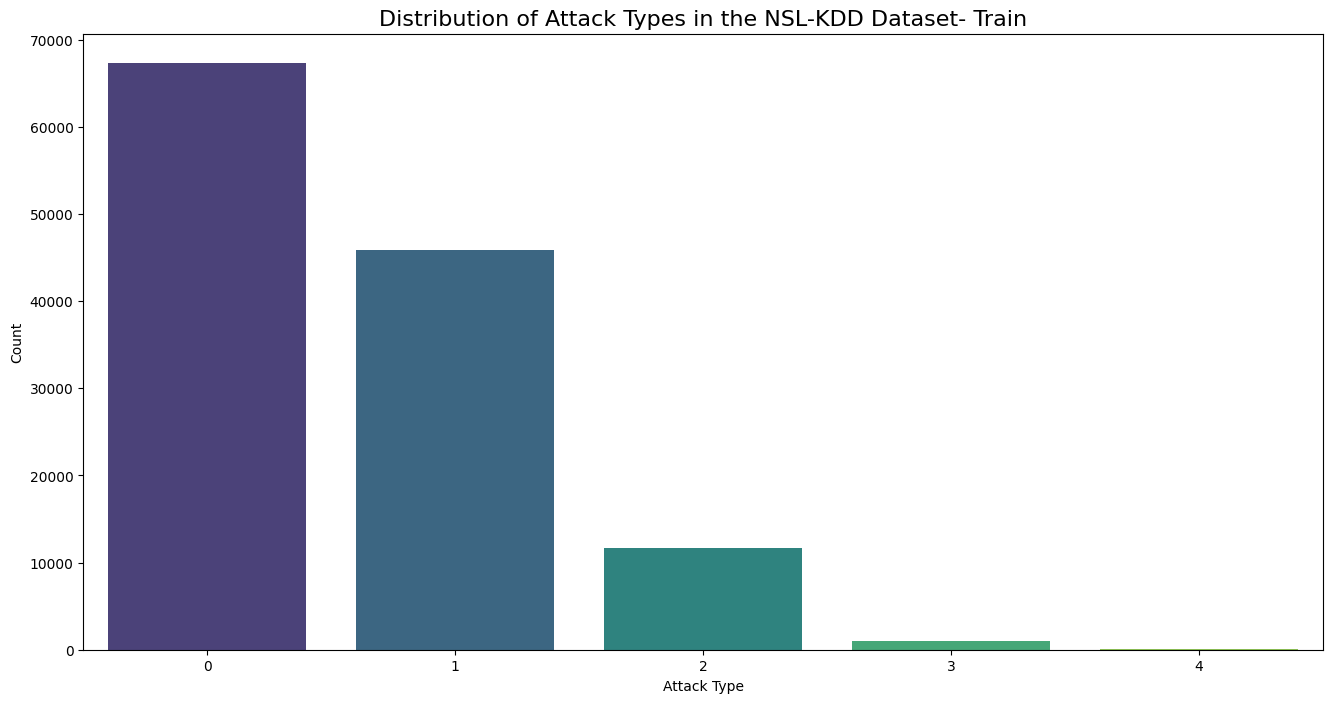

In [16]:
plt.figure(figsize=(16, 8))
sns.countplot(x='label', data=train_set, palette='viridis')
plt.title('Distribution of Attack Types in the NSL-KDD Dataset- Train', fontsize=16)
plt.xlabel('Attack Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=0, fontsize=10) 
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_4216\1395552152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=test_set, palette='viridis')


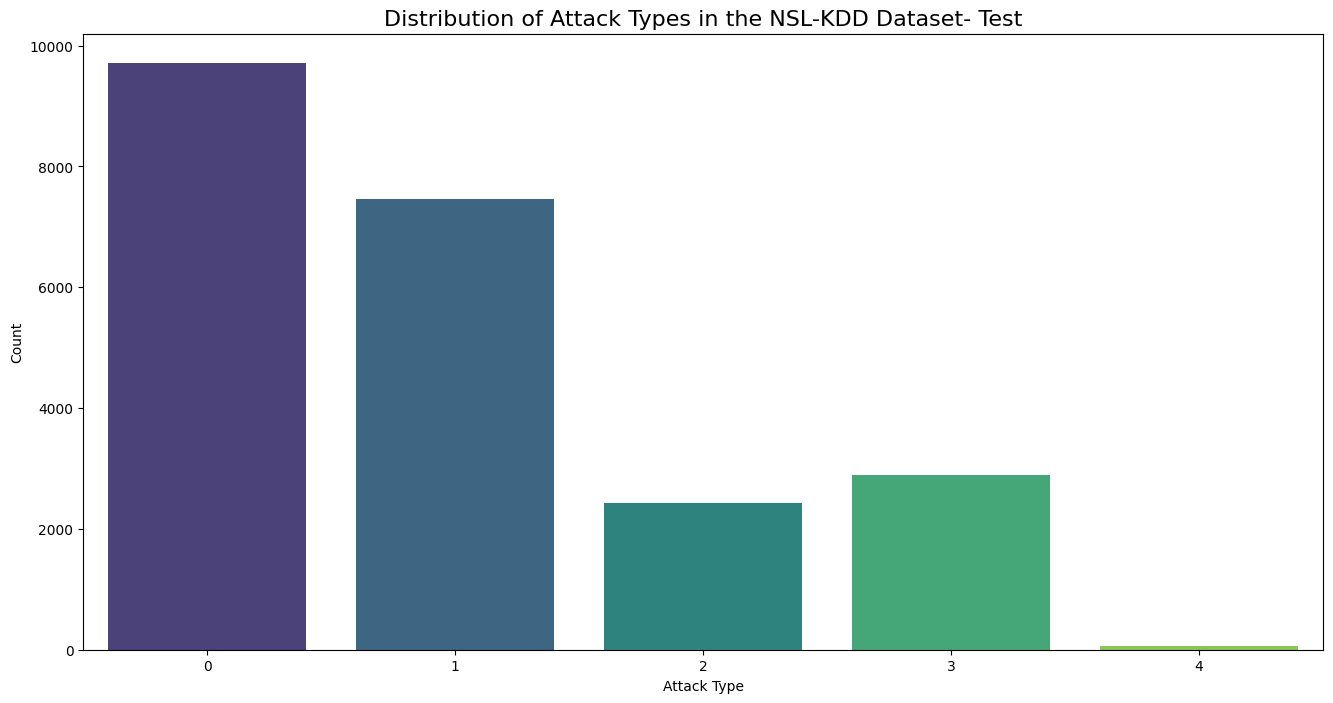

In [17]:
plt.figure(figsize=(16, 8))
sns.countplot(x='label', data=test_set, palette='viridis')
plt.title('Distribution of Attack Types in the NSL-KDD Dataset- Test', fontsize=16)
plt.xlabel('Attack Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=0, fontsize=10) 
plt.show()

Categorical Features Encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
categorical_columns=['protocol_type', 'service', 'flag']

train_categorical_values = train_set[categorical_columns]
test_categorical_values = test_set[categorical_columns]
train_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [8]:
# protocol type
unique_protocol=sorted(train_set.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol_train=[string1 + x for x in unique_protocol]
print(unique_protocol_train)

# service
unique_service=sorted(train_set.service.unique())
string2 = 'service_'
unique_service_train=[string2 + x for x in unique_service]
print(unique_service_train)


# flag
unique_flag=sorted(train_set.flag.unique())
string3 = 'flag_'
unique_flag_train=[string3 + x for x in unique_flag]
print(unique_flag_train)


# put together
dumcols_train=unique_protocol_train + unique_service_train + unique_flag_train


#do it for test set
unique_service_test=sorted(test_set.service.unique())
unique_service_test=[string2 + x for x in unique_service_test]
dumcols_test=unique_protocol_train + unique_service_test + unique_flag_train


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

In [9]:
encoder = OneHotEncoder(categories='auto')
train_categorical_values_enc = encoder.fit_transform(train_categorical_values)
train_cat_data = pd.DataFrame(train_categorical_values_enc.toarray(),columns=dumcols_train)


# test set
testdf_categorical_values_enc = encoder.fit_transform(test_categorical_values)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_enc.toarray(),columns=dumcols_test)

train_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
testdf_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
trainservice=train_set['service'].tolist()
testservice= test_set['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_urh_i',
 'service_http_2784',
 'service_http_8001',
 'service_aol',
 'service_red_i',
 'service_harvest']

In [11]:
for col in difference:
    testdf_cat_data[col] = 0

print(train_cat_data.shape)    
print(testdf_cat_data.shape)

(125973, 84)
(22544, 84)


In [12]:
newdf_train=train_set.join(train_cat_data)
newdf_train.drop('flag', axis=1, inplace=True)
newdf_train.drop('protocol_type', axis=1, inplace=True)
newdf_train.drop('service', axis=1, inplace=True)

# test data
newdf_test=test_set.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

print(newdf_train.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [26]:
newdf_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
newdf_train.sort_index(axis=1,inplace=True)
newdf_test.sort_index(axis=1,inplace=True)

# Model Training

1. ANN

In [28]:
x_train = newdf_train
x_train = x_train.drop(['label'], axis=1)
y_train = newdf_train['label']

x_test = newdf_test
x_test = newdf_test.drop(['label'],axis=1)
y_test = newdf_test['label']

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [30]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Conv2D,MaxPooling2D,Flatten,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [32]:
model_ANN = Sequential()

model_ANN.add(Dense(units = 256,activation='relu',kernel_regularizer=l2(0.001), input_shape = (122,)))
model_ANN.add(Dropout(0.3))

model_ANN.add(Dense(units = 128,activation='relu',kernel_regularizer=l2(0.001)))
model_ANN.add(Dropout(0.4))

model_ANN.add(Dense(units = 64,activation='relu',kernel_regularizer=l2(0.001)))
model_ANN.add(Dropout(0.5))

model_ANN.add(Dense(units = 128,activation='relu',kernel_regularizer=l2(0.001)))
model_ANN.add(Dropout(0.5))

model_ANN.add(Dense(units = 256,activation='relu'))
model_ANN.add(Dropout(0.6))

model_ANN.add(Dense(units = 5,activation = 'softmax'))

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model_ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        31,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,269 (450.27 KB)

 Trainable params: 115,269 (450.27 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model_ANN.compile(optimizer = Adam(learning_rate = 0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
)

In [36]:
ANN_history = model_ANN.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 100,batch_size=32, callbacks = [early_stopping],verbose = 1, shuffle = True)

Epoch 1/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9315 - loss: 0.4897 - val_accuracy: 0.7816 - val_loss: 2.0021
Epoch 2/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9826 - loss: 0.1179 - val_accuracy: 0.7583 - val_loss: 1.8591
Epoch 3/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9829 - loss: 0.1076 - val_accuracy: 0.7732 - val_loss: 1.7766
Epoch 4/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9829 - loss: 0.0975 - val_accuracy: 0.8091 - val_loss: 1.4639
Epoch 5/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9843 - loss: 0.0933 - val_accuracy: 0.7879 - val_loss: 1.4757
Epoch 6/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9836 - loss: 0.0945 - val_accuracy: 0.7759 - val_loss: 1.6820
Epoch 7/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9840 - loss: 0.0897 - val_accuracy: 0.7874 - val_loss: 1.9613
Epoch 8/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9850 -

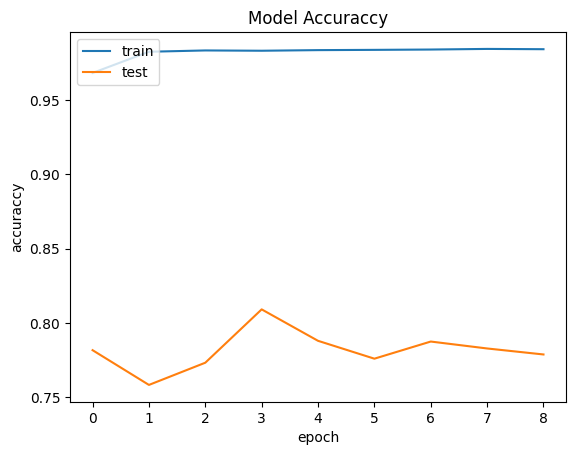

In [37]:
plt.plot(ANN_history.history['accuracy'])
plt.plot(ANN_history.history['val_accuracy'])
plt.title("Model Accuraccy")
plt.ylabel('accuraccy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

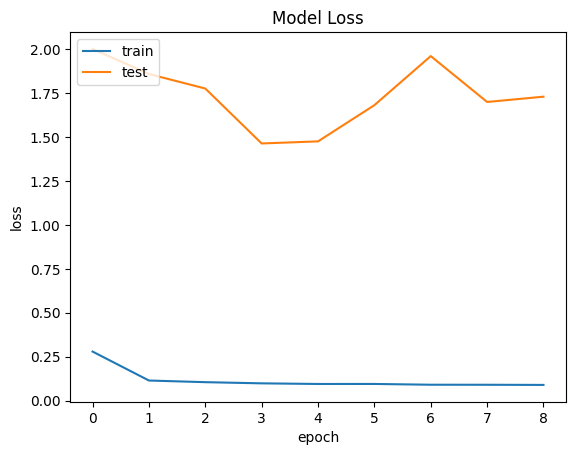

In [38]:
plt.plot(ANN_history.history['loss'])
plt.plot(ANN_history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [39]:
test_loss, test_accuracy = model_ANN.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8112 - loss: 1.4411
Test Loss: 1.4639
Test Accuracy: 0.8091


In [40]:
y_pred_probs = model_ANN.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1) 

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.72      0.96      0.82      9711
           1       0.96      0.85      0.90      7460
           2       0.84      0.76      0.80      2421
           3       0.94      0.25      0.40      2885
           4       0.00      0.00      0.00        67

    accuracy                           0.81     22544
   macro avg       0.69      0.56      0.58     22544
weighted avg       0.84      0.81      0.79     22544

Confusion Matrix:
[[9355   62  272   22    0]
 [1109 6312   32    7    0]
 [ 345  231 1845    0    0]
 [2116    1   40  728    0]
 [  52    0    0   15    0]]


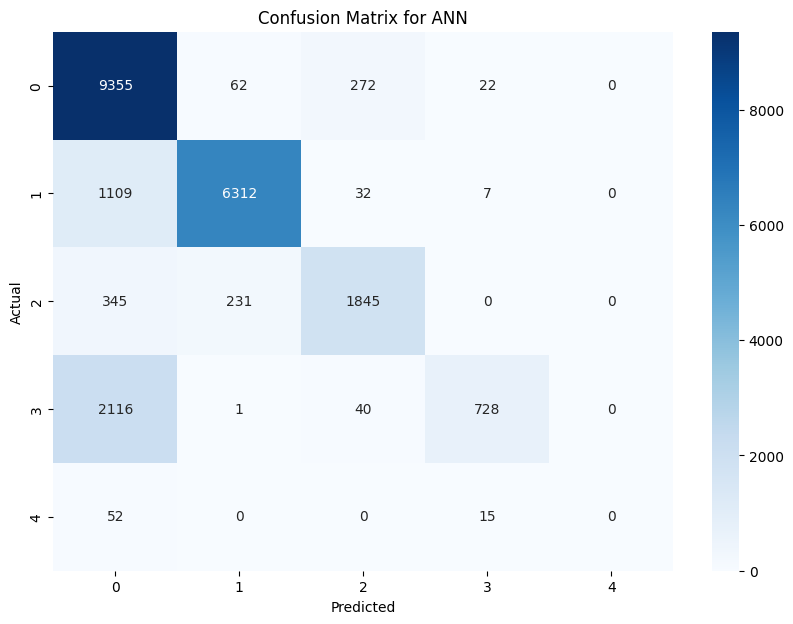

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate a classification report
print(classification_report(y_test, y_pred))

# Optional: Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for ANN')
plt.show()


In [42]:
model_ANN.save('model_ANN.h5')

2. CNN

In [47]:
x_train2 = newdf_train
x_train2 = x_train2.drop(['label'], axis=1)
y_train2 = newdf_train['label']

x_test2 = newdf_test
x_test2 = newdf_test.drop(['label'],axis=1)
y_test2 = newdf_test['label']

In [48]:
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

In [49]:
x_train2_reshaped = x_train2.reshape(x_train2.shape[0],1,x_train2.shape[1],1)
x_test2_reshaped = x_test2.reshape(x_test2.shape[0],1,x_test2.shape[1],1)

In [65]:
model_CNN = Sequential([
    Conv2D(64, (1, 3), activation='relu', input_shape=(1, x_train2.shape[1], 1)),
    MaxPooling2D(pool_size=(1, 2)),
    Conv2D(32, (1, 3), activation='relu'),
    MaxPooling2D(pool_size=(1, 2)),
    Conv2D(16, (1, 3), activation='relu'),
    MaxPooling2D(pool_size=(1, 2)),
    Conv2D(32, (1, 3), activation='relu'),
    MaxPooling2D(pool_size=(1, 2)),
    Conv2D(64, (1, 3), activation='relu'),
    MaxPooling2D(pool_size=(1, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model_CNN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 1, 120, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 60, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 58, 32)      │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 29, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 27, 16)      │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 13, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 11, 32)      │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 1, 3, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,245 (79.08 KB)

 Trainable params: 20,245 (79.08 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model_CNN.compile(optimizer = Adam(learning_rate = 0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [68]:
CNN_history = model_CNN.fit(x_train2_reshaped,y_train2, validation_data = (x_test2_reshaped, y_test2), epochs = 100,batch_size=32, callbacks = [early_stopping],verbose = 1, shuffle = True)

Epoch 1/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9411 - loss: 0.2107 - val_accuracy: 0.7696 - val_loss: 1.1832
Epoch 2/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9879 - loss: 0.0407 - val_accuracy: 0.7693 - val_loss: 1.4204
Epoch 3/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.7679 - val_loss: 1.5661
Epoch 4/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9903 - loss: 0.0291 - val_accuracy: 0.7571 - val_loss: 1.6354
Epoch 5/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9919 - loss: 0.0254 - val_accuracy: 0.7453 - val_loss: 1.9650
Epoch 6/100
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9930 - loss: 0.0209 - val_accuracy: 0.7792 - val_loss: 1.7462


In [69]:
loss, accuracy = model_CNN.evaluate(x_test2_reshaped, y_test2)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7722 - loss: 1.1588
Test Loss: 1.1832029819488525, Test Accuracy: 0.769561767578125


In [70]:
predictions = model_CNN.predict(x_test2_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


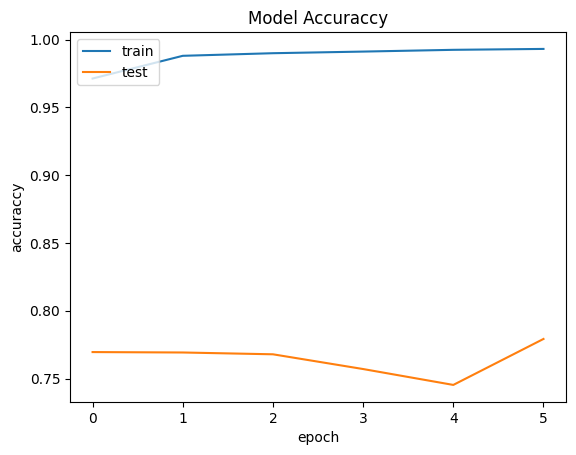

In [72]:
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title("Model Accuraccy")
plt.ylabel('accuraccy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

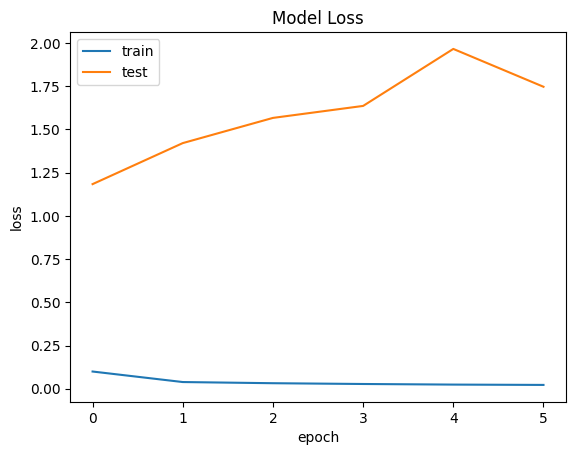

In [73]:
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.93      0.79      9711
           1       0.88      0.91      0.89      7460
           2       0.90      0.56      0.69      2421
           3       0.97      0.06      0.11      2885
           4       0.86      0.09      0.16        67

    accuracy                           0.77     22544
   macro avg       0.86      0.51      0.53     22544
weighted avg       0.81      0.77      0.73     22544

Confusion Matrix:
[[9055  541  113    2    0]
 [ 683 6757   20    0    0]
 [ 657  406 1358    0    0]
 [2689    3   19  173    1]
 [  58    0    0    3    6]]


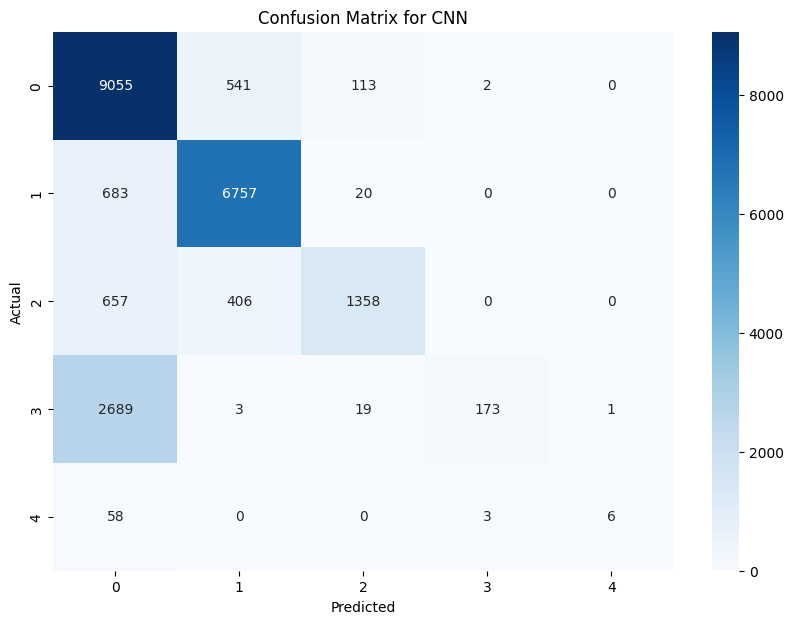

In [74]:
# Generate a classification report
print(classification_report(y_test2, predicted_classes))

# Optional: Generate a confusion matrix
conf_matrix = confusion_matrix(y_test2, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for CNN')
plt.show()

In [75]:
model_CNN.save('model_CNN.h5')